## Emotion
https://huggingface.co/cardiffnlp/twitter-roberta-base-emotion-multilabel-latest

- on corrected and expanded prompts
- per prompt
- aggregate per user, then per gender
- can later be correlated with code quality on prompt level

### Problems
- "I get the following error" gets high anger and disgust scores but should be neutral
- "He gives me an error, out-lastname.trim() is not a function." get high anger and disgust score
- "So I would like to add another adjustment. The soundtrack has to be exported a total of 9,309." gets high anger score but is polite

In [10]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../../../data/giicg.db")
prompts = pd.read_sql("Select * from expanded_prompts", conn)
conn.close()
prompts

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language,normalized
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en,"parsing data from python iterator, how it coul..."
1,724,31,user,Write python function to do operations with in...,Write python function to do operations with in...,,,Man (cisgender),6,en,Write python function to do operations with in...
2,1124,53,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en,Write shortest tutorial on creating RAG on ema...
3,1126,53,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en,what is FAISS
4,1128,53,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,,Man (cisgender),6,en,Transform given code to process large .mbox file
...,...,...,...,...,...,...,...,...,...,...,...
701,1114,52,user,"ok and then last question: Why is ""Consolas"" l...","ok and then last question: Why is ""Consolas"" l...",,,Man (cisgender),91,en,"ok and then last question: Why is ""Consolas"" l..."
702,1116,52,user,i load it like this:\n\n@font-face {\n font...,i load it like this:,@font-face {\n font-family: 'Consolas';\n ...,,Man (cisgender),91,en,i load it like this:
703,1118,52,user,should i be able to open the .woff in windows ...,should i be able to open the .woff in windows ...,,,Man (cisgender),91,en,should i be able to open the .woff in windows ...
704,1120,52,user,"ok, i am not calling it in the body. how do i ...","ok, i am not calling it in the body. how do i ...",,,Man (cisgender),91,en,"ok, i am not calling it in the body. how do i ..."


In [12]:
from helpers.normalization import remove_punctuation_and_newlines

prompts['normalized'] = prompts['normalized'].apply(remove_punctuation_and_newlines)
prompts

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language,...,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en,...,0.918558,0.013882,0.002753,0.004167,0.001093,0.007007,0.006792,0.009141,0.022811,0.006660
1,724,31,user,Write python function to do operations with in...,Write python function to do operations with in...,,,Man (cisgender),6,en,...,0.604258,0.025751,0.003438,0.211091,0.007075,0.037302,0.007961,0.033860,0.041479,0.011589
2,1124,53,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en,...,0.405695,0.012482,0.001791,0.138658,0.001828,0.393545,0.002451,0.002656,0.005500,0.024475
3,1126,53,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en,...,0.223669,0.284659,0.033092,0.002264,0.001783,0.001813,0.024958,0.073640,0.204587,0.003499
4,1128,53,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,,Man (cisgender),6,en,...,0.513866,0.030606,0.005427,0.184718,0.015504,0.095298,0.012088,0.019028,0.056134,0.033361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1114,52,user,"ok and then last question: Why is ""Consolas"" l...","ok and then last question: Why is ""Consolas"" l...",,,Man (cisgender),91,en,...,0.259583,0.290207,0.008340,0.002413,0.001427,0.002597,0.024431,0.070117,0.105232,0.004766
702,1116,52,user,i load it like this:\n\n@font-face {\n font...,i load it like this:,@font-face {\n font-family: 'Consolas';\n ...,,Man (cisgender),91,en,...,0.357541,0.022074,0.008192,0.315808,0.014498,0.155039,0.017494,0.037751,0.020398,0.034710
703,1118,52,user,should i be able to open the .woff in windows ...,should i be able to open the .woff in windows ...,,,Man (cisgender),91,en,...,0.806610,0.075482,0.003271,0.005858,0.001733,0.003659,0.014830,0.020341,0.022659,0.006790
704,1120,52,user,"ok, i am not calling it in the body. how do i ...","ok, i am not calling it in the body. how do i ...",,,Man (cisgender),91,en,...,0.582901,0.122165,0.012217,0.015327,0.003265,0.004109,0.034321,0.086059,0.092331,0.008334


In [13]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

def load_model(path):
    tokenizer = AutoTokenizer.from_pretrained(path)
    config = AutoConfig.from_pretrained(path)
    model = AutoModelForSequenceClassification.from_pretrained(path)
    model.save_pretrained(path)
    tokenizer.save_pretrained(path)
    return model, tokenizer, config

def analyze_sentiment(text, model, tokenizer):
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    return scores

def process_row(text):
    scores = analyze_sentiment(text, model, tokenizer)
    return pd.Series(scores, index=['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'])


path = f"../cardiffnlp/twitter-roberta-large-emotion-latest"
model, tokenizer, config = load_model(path)
prompts[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']] = (
    prompts['normalized'].apply(process_row))

prompts

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language,...,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en,...,0.881912,0.016886,0.004211,0.012060,0.001955,0.020476,0.009231,0.011614,0.022537,0.010408
1,724,31,user,Write python function to do operations with in...,Write python function to do operations with in...,,,Man (cisgender),6,en,...,0.536261,0.018487,0.003212,0.288236,0.008931,0.035174,0.007594,0.037235,0.040266,0.012009
2,1124,53,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en,...,0.405695,0.012482,0.001791,0.138658,0.001828,0.393545,0.002451,0.002656,0.005500,0.024475
3,1126,53,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en,...,0.223669,0.284659,0.033092,0.002264,0.001783,0.001813,0.024958,0.073640,0.204587,0.003499
4,1128,53,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,,Man (cisgender),6,en,...,0.524920,0.036376,0.006294,0.174948,0.014279,0.083132,0.013779,0.021222,0.056130,0.030487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1114,52,user,"ok and then last question: Why is ""Consolas"" l...","ok and then last question: Why is ""Consolas"" l...",,,Man (cisgender),91,en,...,0.233715,0.297883,0.008695,0.002920,0.001411,0.002267,0.018675,0.062186,0.086505,0.004273
702,1116,52,user,i load it like this:\n\n@font-face {\n font...,i load it like this:,@font-face {\n font-family: 'Consolas';\n ...,,Man (cisgender),91,en,...,0.295137,0.020715,0.010432,0.345609,0.012649,0.185561,0.016872,0.048622,0.018324,0.031754
703,1118,52,user,should i be able to open the .woff in windows ...,should i be able to open the .woff in windows ...,,,Man (cisgender),91,en,...,0.785502,0.078101,0.003400,0.008290,0.002540,0.003586,0.014717,0.028228,0.025660,0.007928
704,1120,52,user,"ok, i am not calling it in the body. how do i ...","ok, i am not calling it in the body. how do i ...",,,Man (cisgender),91,en,...,0.423355,0.177502,0.012383,0.017345,0.003260,0.004114,0.051797,0.168969,0.091742,0.008542


## Average per user

In [14]:
mean_user_scores = prompts.groupby(['user_id', 'gender'])[['anger', 'disgust', 'joy']].mean().reset_index()
mean_user_scores

,user_id,gender,anger,disgust,joy
0,6,Man (cisgender),0.027021,0.046372,0.070457
1,11,Woman (cisgender),0.048956,0.064191,0.034295
2,15,Man (cisgender),0.292917,0.129067,0.004509
3,16,Woman (cisgender),0.016744,0.026533,0.040393
4,25,Man (cisgender),0.005609,0.012217,0.008264
5,28,Woman (cisgender),0.055645,0.024696,0.044032
6,30,Non-binary,0.001189,0.003565,0.019853
7,31,Man (cisgender),0.025286,0.029032,0.024438
8,34,Man (cisgender),0.102156,0.137329,0.049210
9,46,Man (cisgender),0.072174,0.084877,0.030433


## Average per gender on user base


In [15]:
mean_gender_user_scores = mean_user_scores.groupby('gender')[['anger', 'disgust', 'joy']].mean().reset_index()
mean_gender_user_scores

,gender,anger,disgust,joy
0,Another gender,0.007850,0.016148,0.009585
1,Man (cisgender),0.074444,0.087805,0.066997
2,Non-binary,0.001189,0.003565,0.019853
3,Woman (cisgender),0.053051,0.065350,0.050712


In [16]:

from helpers.statistical_tests import run_t_test_on_gender

run_t_test_on_gender(mean_user_scores, 'anger')

T-statistic: 0.9470, p-value: 0.3566


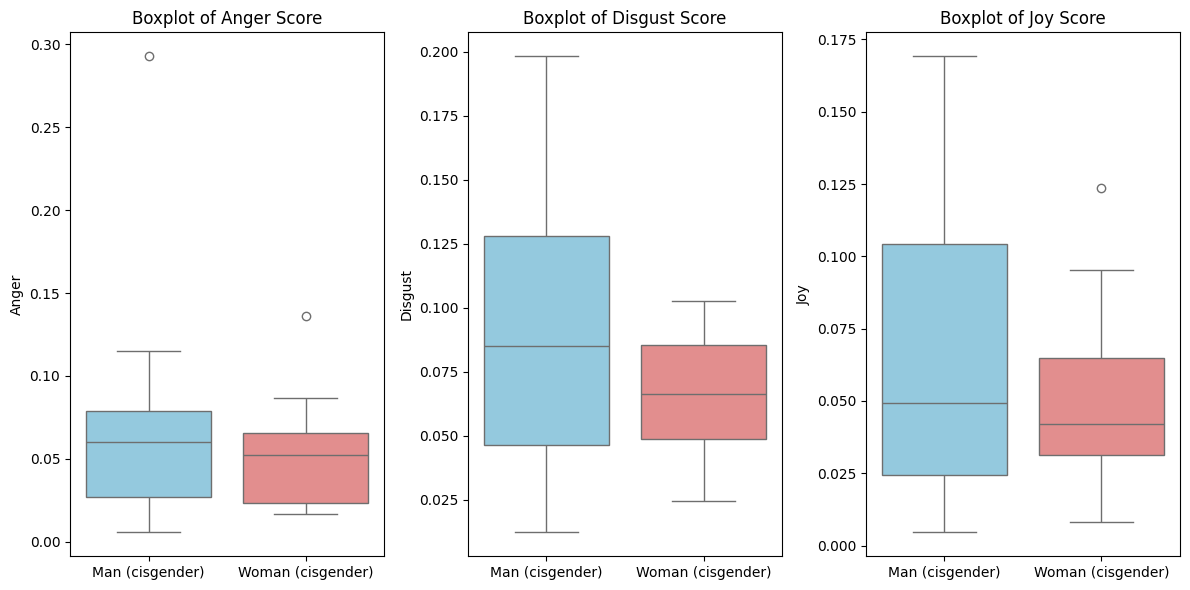

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered = mean_user_scores[mean_user_scores['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])]
score_types = ['anger', 'disgust', 'joy']

plt.figure(figsize=(12, 6))

for i, score in enumerate(score_types):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(
        x='gender',
        y=score,
        hue='gender',
        data=filtered,
        palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'},
        legend=False
    )
    plt.title(f'Boxplot of {score.capitalize()} Score')
    plt.xlabel('')
    plt.ylabel(score.capitalize())
    plt.legend([],[], frameon=False)  # Remove the redundant legend

plt.tight_layout()
plt.show()

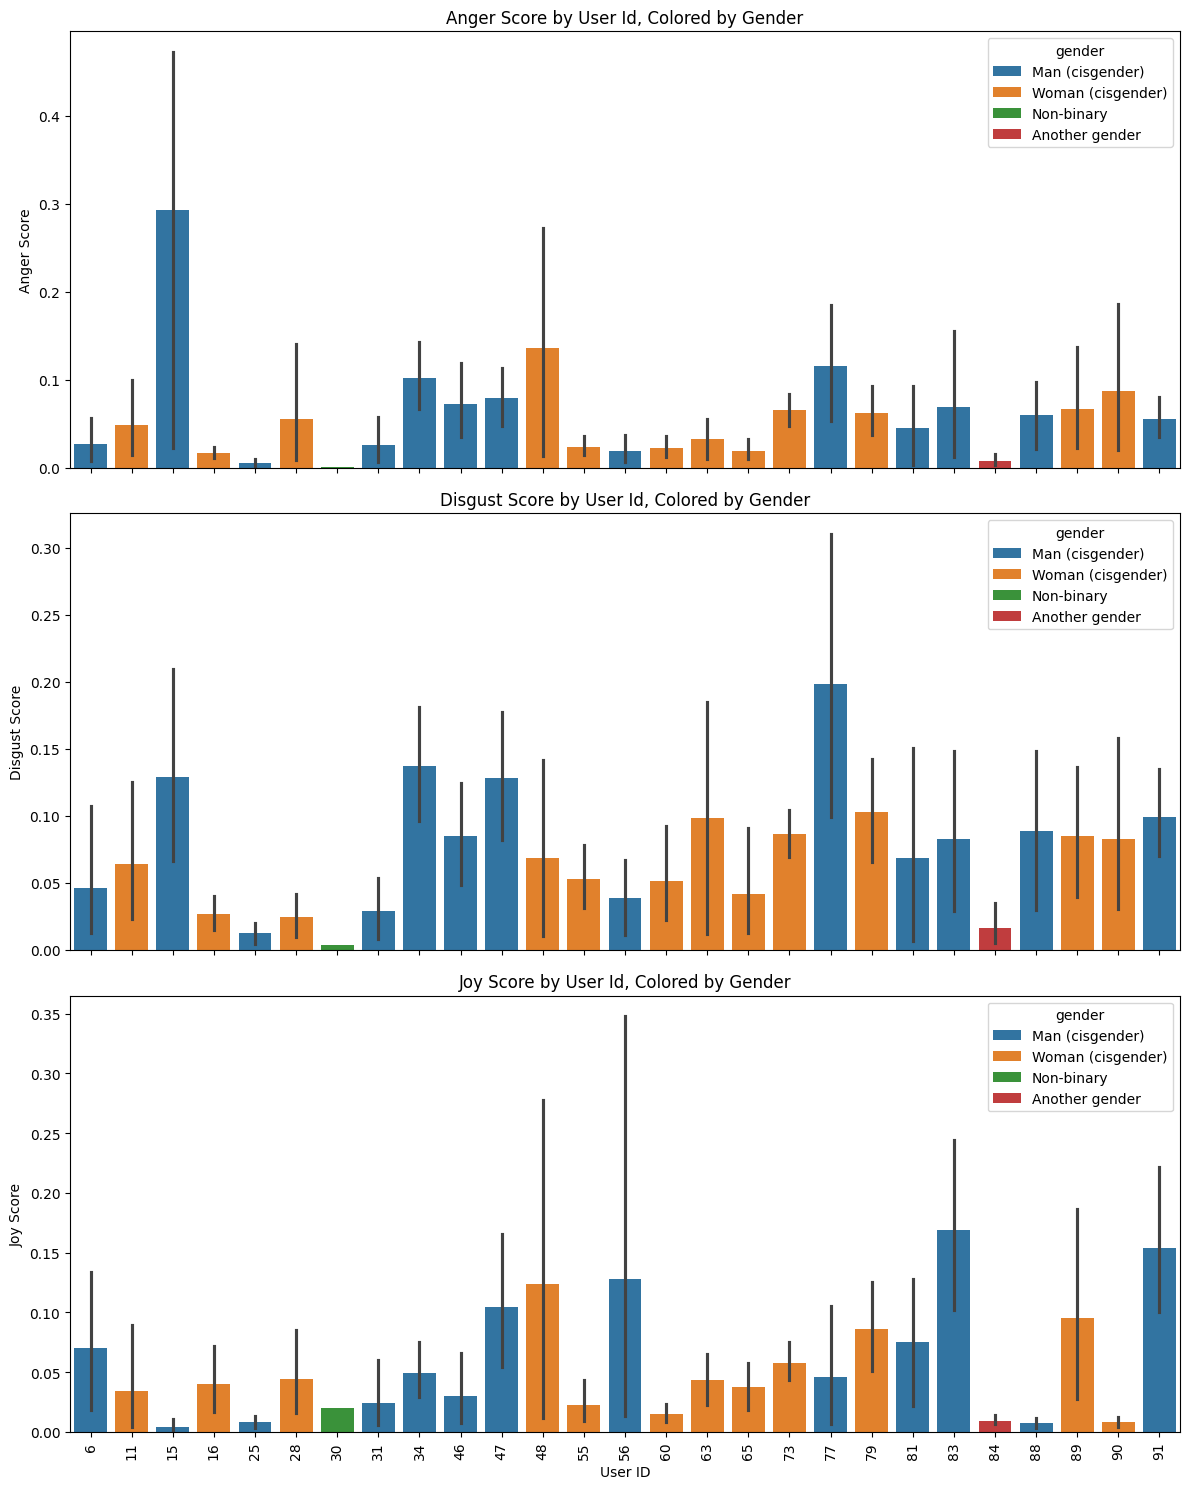

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

score_types = ['anger', 'disgust', 'joy']
titles = ['Anger Score', 'Disgust Score', 'Joy Score']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)

for i, (score, title) in enumerate(zip(score_types, titles)):
    sns.barplot(
        data=prompts,
        x='user_id',
        y=score,
        hue='gender',
        dodge=False,
        ax=axes[i]
    )
    axes[i].set_ylabel(f'{score.capitalize()} Score')
    axes[i].set_title(f'{title} by User Id, Colored by Gender')
    axes[i].set_xlabel('')  # Only label x-axis on bottom plot

axes[2].set_xlabel('User ID')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [19]:
filtered = prompts[prompts['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])]

# For each emotion, count the number of prompts > 0.25, grouped by gender
emotion_threshold = 0.25

# Create a result DataFrame with counts
counts_df = pd.DataFrame({
    'anger': filtered[filtered['anger'] > emotion_threshold].groupby('gender').size(),
    'disgust': filtered[filtered['disgust'] > emotion_threshold].groupby('gender').size(),
    'joy': filtered[filtered['joy'] > emotion_threshold].groupby('gender').size()
}).fillna(0).astype(int).reset_index()

counts_df


,gender,anger,disgust,joy
0,Man (cisgender),28,45,30
1,Woman (cisgender),29,44,31
